In [81]:
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
cd utils

/Users/evansadler/Desktop/Capstone/classes


In [3]:
import model_data as md

In [4]:
cd ..

/Users/evansadler/Desktop/Capstone


In [293]:
df_d = pd.read_csv('data/final/demand_all_features.csv', parse_dates=['date'], infer_datetime_format=True)

In [17]:
df_d = md.clean(df_d)

In [22]:
rf = RFC(n_jobs=-1, n_estimators=100)

In [28]:
md.train_model(df_d, rf=rf)

(0.86229815724736703,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False))

In [341]:
df_s = pd.read_csv('data/final/supply_all_features.csv', parse_dates=['date'], infer_datetime_format=True)

In [343]:
df_s = md.clean(df_s)

In [27]:
md.train_model(df_s, rf=rf)

(0.85598292308799639,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False))

In [110]:
feature_names = df_d.drop(['count', 'date','terminal','ecosystem','cluster'], axis=1).columns
importances = rf.feature_importances_
important_names = feature_names[importances > np.mean(importances)]
print important_names

Index([u'TEMP', u'SPD', u'DEWP', u'SLP', u'STP', u'elevation',
       u'hour_avg_lagged', u'month_avg_lagged', u'dow_avg'],
      dtype='object')


In [111]:
for fn, imp in zip(feature_names, importances):
    print fn, imp

TEMP 0.0716642011922
SPD 0.0619097600413
PCP01 0.0148910157695
CLG 0.0570363838624
VSB 0.0271594144582
DEWP 0.066174383307
SLP 0.0617291394065
STP 0.0613601309621
dockcount 0.0290749113888
elevation 0.0660152560755
hour_avg_lagged 0.21053757876
month_avg_lagged 0.110932687218
dow_avg 0.103924880137
Afternoon 0.0163521394171
Commute_from_work 0.0227312671684
Commute_to_work 0.0103210047404
Night 0.00818584609471


In [118]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, rf.predict_proba(test_x)[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

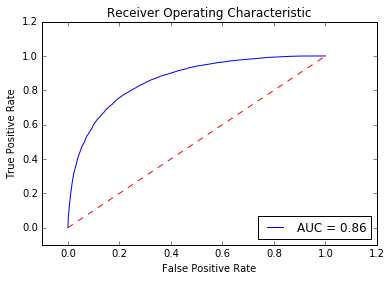

In [119]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [263]:
df_sub = df_d.ix[(df_d['count'] > 0) & (df_d['count'] < 15), :]
df_sub = md.clean(df_sub)
df_sub['count'] = pd.cut(df_sub['count'], [1,3,5,9,50], include_lowest=True, right=False).astype(str)

In [264]:
sample_weights = (len(df_sub['count']) /(df_sub['count'].value_counts()*4)).to_dict()
rf = RFC(n_jobs=-1, n_estimators=100, class_weight=sample_weights)

In [265]:
# Split data
train_x, test_x, train_y, test_y = train_test_split(df_sub.drop(['terminal', 'ecosystem', 'count', 'date', 'cluster'], axis=1), df_s['count'], test_size=0.3)

# Fit data
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True,
            class_weight={'[1, 3)': 0.42416245415799386, '[5, 9)': 1.6917869144099624, '[3, 5)': 1.1112373409504024, '[9, 50)': 6.6039737654320989},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [266]:
rf.score(test_x,test_y)

0.62165319832538213

In [261]:
feature_names = df_s.drop(['count', 'date','terminal','ecosystem','cluster'], axis=1).columns
importances = rf.feature_importances_
important_names = feature_names[importances > np.mean(importances)]
print important_names

Index([u'TEMP', u'SPD', u'CLG', u'DEWP', u'SLP', u'STP', u'elevation',
       u'hour_avg_lagged', u'month_avg_lagged', u'dow_avg'],
      dtype='object')


In [262]:
for fn, imp in zip(feature_names, importances):
    print fn, imp

TEMP 0.0829767213642
SPD 0.0748926398441
PCP01 0.014563114037
CLG 0.0624333081164
VSB 0.0174747969683
DEWP 0.0776205933906
SLP 0.0701124185076
STP 0.0704425771265
dockcount 0.0302768812555
elevation 0.0715647170519
hour_avg_lagged 0.182398969635
month_avg_lagged 0.103237611891
dow_avg 0.104516703382
Afternoon 0.00924248739928
Commute_from_work 0.0107259949591
Commute_to_work 0.00930263963691
Night 0.00821782543482


In [294]:
# Split data
rf = RFC(n_jobs=-1, n_estimators=100)
df_d = md.clean(df_d)
df_d.ix[df_d['count'] > 0, 'count'] = 1
train_x, test_x, train_y, test_y = train_test_split(df_d.drop(['terminal', 'ecosystem', 'count', 'date', 'cluster'], axis=1), df_d['count'], test_size=0.3)

# Fit data
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [295]:
from sklearn.metrics import precision_score

In [298]:
precision_score(test_y, rf.predict(test_x))

0.7757312012954154

In [303]:
x = confusion_matrix(test_y, rf.predict(test_x))

In [305]:
recall = float(x[1,1])/(x[1,1] + x[1,0])
specificity = float(x[0,0])/(x[0,0] + x[0,1])

In [306]:
recall

0.7359577532405185

In [308]:
specificity

0.8226064681396094

In [313]:
df_sub = df_s.ix[(df_s['count'] > 0) & (df_s['count'] < 15), :]
df_sub = md.clean(df_sub)
df_sub['count'] = pd.cut(df_sub['count'], [1,3,5,9,50], include_lowest=True, right=False).astype(str)

In [314]:
sample_weights = (len(df_sub['count']) /(df_sub['count'].value_counts()*4)).to_dict()
rf = RFC(n_jobs=-1, n_estimators=100, class_weight=sample_weights)

In [316]:
# Split data
train_x, test_x, train_y, test_y = train_test_split(df_sub.drop(['terminal', 'ecosystem', 'count', 'date', 'cluster'], axis=1), df_sub['count'], test_size=0.3)

# Fit data
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True,
            class_weight={'[1, 3)': 0.42416245415799386, '[5, 9)': 1.6917869144099624, '[3, 5)': 1.1112373409504024, '[9, 50)': 6.6039737654320989},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [317]:
rf.score(test_x,test_y)

0.61522733911011585

In [344]:
rf = RFC(n_jobs=-1, n_estimators=100)
df_s.ix[df_s['count'] > 0, 'count'] = 1

# Split data
train_x, test_x, train_y, test_y = train_test_split(df_s.drop(['terminal', 'ecosystem', 'count', 'date', 'cluster'], axis=1), df_s['count'], test_size=0.3)

# Fit data
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [345]:
x = confusion_matrix(test_y, rf.predict(test_x))
recall = float(x[1,1])/(x[1,1] + x[1,0])
specificity = float(x[0,0])/(x[0,0] + x[0,1])
print recall, specificity

0.733646652599 0.818123547793
